In [1]:
import numpy as np
import matplotlib.pyplot as plt
import opensimplex


In [2]:
def save(xs, ys, name, scale=100):
    f = open(name if name.endswith(".svg") else name + ".svg", "w")
    minx = min(map(min, xs))
    miny = min(map(min, ys))
    xs = [scale*(x - minx) for x in xs]
    ys = [scale*(y - miny) for y in ys]

    maxx = max(map(max, xs))
    maxy = max(map(max, ys))

    print("size:", maxx, maxy)
    
    f.write(f"""<?xml version=\"1.0\" standalone=\"no\"?>
    <!DOCTYPE svg PUBLIC \"-//W3C//DTD SVG 1.1//EN\"
    \"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd\">
    <svg height=\"{maxy}mm\" width=\"{maxx}mm\"
    xmlns=\"http://www.w3.org/2000/svg\" version=\"1.1\"
    viewBox=\"0 0 {maxx} {maxy}\">
    """)

    for px, py in zip(xs, ys):
        f.write("<polyline points=\"")
        f.write("\n".join(f"{xx},{yy}" for xx, yy in zip(px, py)))
        f.write("\" fill=\"none\" stroke=\"black\" stroke-width=\"0.1\"/>\n")

    f.write("</svg>")
    

def show(xs, ys):
    plt.gca().set_aspect('equal')
    plt.rcParams["figure.figsize"] = (15, 15)
    for (x, y) in zip(xs, ys):
        plt.plot(x, -y, "black")
    plt.show()


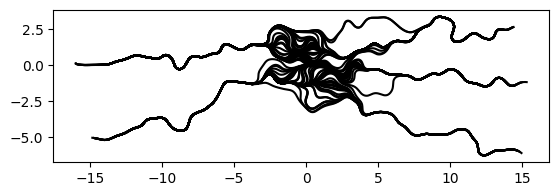

size: 3132.323906839056 962.6131856941704


In [3]:
# TODO comment properly

N = 100
SCALE = 2
STEPS = 400
STEP_SIZE = 0.02 * SCALE
WINDING = 0.4
CROP = 8

opensimplex.seed(1)
# opensimplex.seed(0)

VIS_DIM = 32
alpha = opensimplex.noise2array(np.linspace(-SCALE*5, SCALE*5, VIS_DIM), np.linspace(-SCALE*5, SCALE*5, VIS_DIM)) * np.pi * WINDING
nx = np.cos(alpha)
ny = np.sin(alpha)

nx = nx * alpha
ny = ny * alpha

# # plt.imshow(alpha)
# plt.quiver(nx, ny)
# plt.show()

def next(x, y, direction=1):
    alpha = np.asarray(
        [
            (
                # opensimplex.noise2(x=xx, y=yy) + opensimplex.noise2(x=-xx, y=yy) +
                opensimplex.noise2(x=xx, y=-yy) + opensimplex.noise2(x=-xx, y=-yy)
            )
            for xx, yy in zip(x, y)
        ]
    ) * np.pi * WINDING
    dx = np.cos(alpha)
    dy = np.sin(alpha)
    norm = (dx**2 + dy**2)**0.5
    dx /= norm
    dy /= norm
    x = x + dx * STEP_SIZE * direction
    y = y + dy * STEP_SIZE * direction
    x = np.clip(x, -SCALE*CROP, SCALE*CROP)
    y = np.clip(y, -SCALE*CROP, SCALE*CROP)
    return x, y


def flow_lines():
    xs = np.random.uniform(-SCALE, SCALE, N)[None, :]
    ys = np.random.uniform(-SCALE, SCALE, N)[None, :]
    # D = int(N**0.5)
    # base = np.linspace(-SCALE, SCALE, D)
    # base = np.repeat(base[None, :], D, axis=0)
    # xs = base.flatten()[None, :]
    # ys = base.T.flatten()[None, :]
    for i in range(STEPS):
        px, py = next(xs[0], ys[0], -1)
        nx, ny = next(xs[-1], ys[-1], 1)
        xs = np.concatenate((px[None, :], xs, nx[None, :]), axis=0)
        ys = np.concatenate((py[None, :], ys, ny[None, :]), axis=0)
    return xs.T, ys.T

xs, ys = flow_lines()
show(xs, ys)
save(xs, ys, f"BOTH.svg")
